# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> Lucca Delchiaro Costabile </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
import os
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from numpy import mean, var
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import *
import math
from scipy import stats

In [4]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [5]:
df.head(11)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
5,01/10/1965,13:36:32,-13.405,166.629,Earthquake,35.0,NaN,NaN,6.7,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860922,ISCGEM,ISCGEM,ISCGEM,Automatic
6,01/12/1965,13:32:25,27.357,87.867,Earthquake,20.0,NaN,NaN,5.9,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861007,ISCGEM,ISCGEM,ISCGEM,Automatic
7,01/15/1965,23:17:42,-13.309,166.212,Earthquake,35.0,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861111,ISCGEM,ISCGEM,ISCGEM,Automatic
8,01/16/1965,11:32:37,-56.452,-27.043,Earthquake,95.0,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEMSUP861125,ISCGEMSUP,ISCGEM,ISCGEM,Automatic
9,01/17/1965,10:43:17,-24.563,178.487,Earthquake,565.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861148,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [6]:
df['Hemisfério']="Centro" 
df['Hemisfério']= df["Latitude"].apply(lambda x: "Norte" if x>0 else "Sul")
df.head(20)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Hemisfério
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
5,01/10/1965,13:36:32,-13.405,166.629,Earthquake,35.0,NaN,NaN,6.7,MW,...,NaN,NaN,NaN,NaN,ISCGEM860922,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
6,01/12/1965,13:32:25,27.357,87.867,Earthquake,20.0,NaN,NaN,5.9,MW,...,NaN,NaN,NaN,NaN,ISCGEM861007,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
7,01/15/1965,23:17:42,-13.309,166.212,Earthquake,35.0,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM861111,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
8,01/16/1965,11:32:37,-56.452,-27.043,Earthquake,95.0,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEMSUP861125,ISCGEMSUP,ISCGEM,ISCGEM,Automatic,Sul
9,01/17/1965,10:43:17,-24.563,178.487,Earthquake,565.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM861148,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul


## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

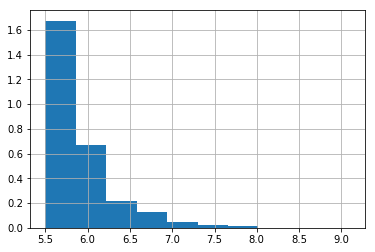

In [22]:
df["Magnitude"].hist(normed=1)

Percebemos uma grande ocorrencia de magnetudes menores, em contraposição com um número cada vez menor de ocorrencias conforme se sobe as magnetudes.

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [41]:

[loc,scale]=stats.expon.fit(df.Magnitude)
lamb=2
mu=1/lamb
sigma=1/lamb

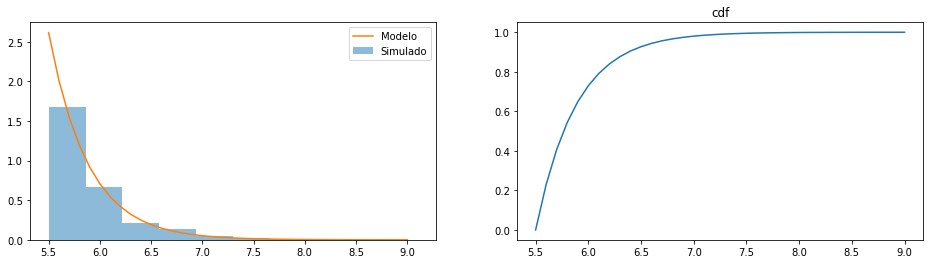

In [42]:
fig, ax=plt.subplots(1,2, figsize =(16,4))

ax[0].hist(df["Magnitude"], normed =True, histtype='stepfilled', alpha=0.5,bins=10)
x=np.arange(df["Magnitude"].min(),df["Magnitude"].max(),0.1)
ax[0].plot(x,expon.pdf(x,loc,scale))
ax[0].legend(['Modelo','Simulado'])

ax[1].plot(x, expon.cdf(x,loc,scale))
ax[1].set_title("cdf")

Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

Percebe-se que o comportamento do histograma se adequa ao da exponencial, como era esperdado. Dando peso a teoria de que a ocorrencia de terremotos de altas magnitudes é muito baixa.


## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [72]:
df2=pd.crosstab(df["Type"],df["Hemisfério"],normalize=True)
df2

Hemisfério,Norte,Sul
Type,,
Earthquake,0.447121,0.545191
Explosion,0.000085,0.000085
Nuclear Explosion,0.006279,0.001196
Rock Burst,0.000000,0.000043


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [73]:
Total=df2.loc[:,"Sul"] + df2.loc[:,"Norte"]
Total=Total.sum()
ProbNorte=df2.loc["Earthquake","Norte"]/Total
ProbNorte

0.44712113446096025

Explique o seu raciocínio

Dados todos os casos de tremores no mundo (Total) calculei a probabilidade de ele ser um Terremoto no hemisfério Norte. Parte sobre o todo.

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [74]:
T=df2.loc[:,"Norte"]
P=df2.loc["Nuclear Explosion","Norte"]/T.sum()
P

0.013845719129697655

Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

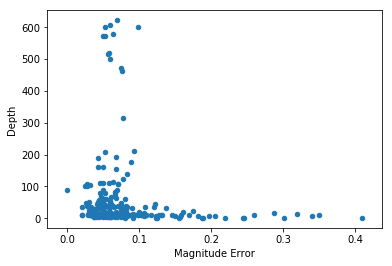

In [80]:
disp= df.plot.scatter(x="Magnitude Error", y="Depth")


Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [87]:
corr.loc["Depth","Magnitude Error"]


-0.076918438923387164

Explique o que significa o valor da correlação calculada acima? 

O numero e demonstra que não existe correlação entre as variáveis

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

In [97]:
df["Latitude"].describe()

count    23412.000000
mean         1.679033
std         30.113183
min        -77.080000
25%        -18.653000
50%         -3.568500
75%         26.190750
max         86.005000
Name: Latitude, dtype: float64

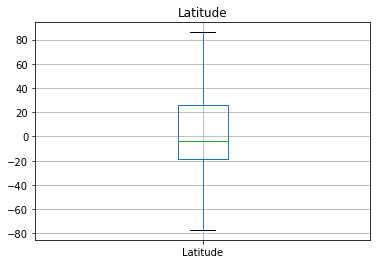

In [98]:
q=df["Latitude"].quantile(np.arange(0,1.1,.1))
q.plot(kind="box",grid=True)
plt.title("Latitude")

In [99]:
df["Longitude"].describe()

count    23412.000000
mean        39.639961
std        125.511959
min       -179.997000
25%        -76.349750
50%        103.982000
75%        145.026250
max        179.998000
Name: Longitude, dtype: float64

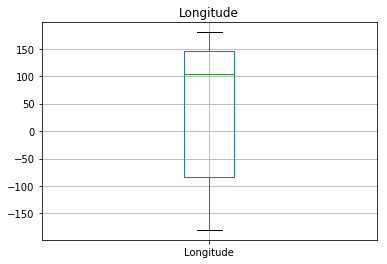

In [100]:
q=df["Longitude"].quantile(np.arange(0,1.1,.1))
q.plot(kind="box",grid=True)
plt.title("Longitude")

Os Valores obtidos mostam em que Hemisférios e em quais lados meridiano de greenwitch ocorrem mais abalos sismicos.

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [112]:
Norte=df[df['Hemisfério']=="Norte"]
pd.crosstab(Norte['Magnitude Type'],Norte["Type"])

Type,Earthquake,Explosion,Nuclear Explosion
Magnitude Type,,,
MB,1547,2,135
MD,6,0,0
MH,5,0,0
ML,65,0,12
MS,766,0,0
MW,3684,0,0
MWB,1112,0,0
MWC,2389,0,0
MWR,12,0,0


In [113]:
Sul=df[df['Hemisfério']=="Sul"]
pd.crosstab(Sul['Magnitude Type'],Sul["Type"])

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst
Magnitude Type,,,,
MB,2047,2,28,0
MS,936,0,0,0
MW,4038,0,0,0
MWB,1346,0,0,0
MWC,3279,0,0,1
MWR,14,0,0,0
MWW,1104,0,0,0


In [127]:
PNorte=135/163
PSul=28/163
print('Probabilidade Norte:',PNorte,"    ","Probabilidade Sul:", PSul)

Probabilidade Norte: 0.8282208588957055      Probabilidade Sul: 0.17177914110429449
